<a href="https://colab.research.google.com/github/Prattoypaul/deeplearning/blob/machinel/Cell_parasited(dt_475).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
dataset=keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/A2__>project/New folder (2)',
    shuffle=True,
    image_size=(256,256),
    batch_size=32
)

Found 2843 files belonging to 2 classes.


In [3]:
classes=dataset.class_names
classes

['Parasitized', 'Uninfected']

In [4]:
len(dataset)

89

(32, 256, 256, 3)
[0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0]


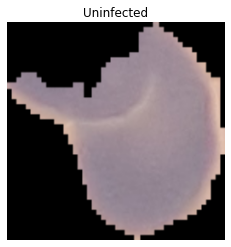

In [5]:
for img_batch,l_batch in dataset.take(1):
  print(img_batch.shape)
  print(l_batch.numpy())
  plt.imshow(img_batch[9].numpy().astype('uint8'))
  plt.title(classes[l_batch[9]])
  plt.axis('off')

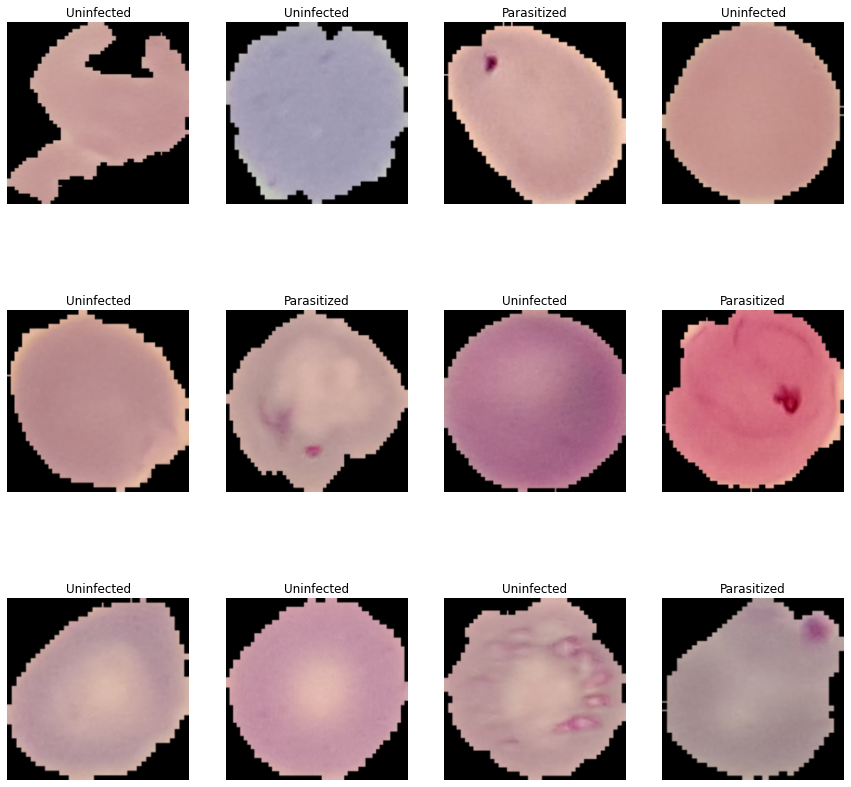

In [6]:
plt.figure(figsize=(15,15))
for img_batch,l_batch in dataset.take(1):
  for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(img_batch[i].numpy().astype('uint8'))
    plt.title(classes[l_batch[i]])
    plt.axis('off')


In [7]:
def get_dataset_pertision(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=100000):
  ds_size=len(ds)
  if shuffle:
    ds=ds.shuffle(shuffle_size,seed=12)
  train_size=int(train_split*ds_size)
  val_size=int(val_split*ds_size)

  train_ds=ds.take(train_size)
  val_ds=ds.skip(train_size).take(val_size)
  test_ds=ds.skip(train_size).skip(val_size)

  return train_ds,val_ds,test_ds
  

In [8]:
train_ds,val_ds,test_ds=get_dataset_pertision(dataset)

In [9]:
print(len(train_ds),len(val_ds),len(test_ds))

71 8 10


In [10]:
train_ds=train_ds.shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [11]:
resize_scale_augment=keras.Sequential([
                               keras.layers.experimental.preprocessing.Resizing(256,256),
                               keras.layers.experimental.preprocessing.Rescaling(1/255),
                               keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
                               keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

In [12]:
from  keras import layers

In [13]:
input_shape=(2,256,256,3)

model=keras.models.Sequential([
                               resize_scale_augment,
                               layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
                               layers.MaxPooling2D((2,2)),
                               layers.Conv2D(64,(3,3),activation='relu'),
                               layers.MaxPooling2D((2,2)),
                               layers.Conv2D(64,(3,3),activation='relu'),
                               layers.MaxPooling2D((2,2)),
                               layers.Conv2D(64,(3,3),activation='relu'),
                               layers.MaxPooling2D((2,2)),
                               layers.Conv2D(64,(3,3),activation='relu'),
                               layers.MaxPooling2D((2,2)),
                               layers.Conv2D(64,(3,3),activation='relu'),
                               layers.MaxPooling2D((2,2)),
                               layers.Flatten(),
                               layers.Dense(64,activation='relu'),
                               layers.Dense(2,activation='softmax')

])
model.build(
    input_shape=input_shape
)
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (2, 256, 256, 3)          0         
_________________________________________________________________
conv2d (Conv2D)              (2, 254, 254, 32)         896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (2, 127, 127, 32)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (2, 125, 125, 64)         18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (2, 62, 62, 64)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (2, 60, 60, 64)           36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (2, 30, 30, 64)          

In [14]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [15]:
history=model.fit(
    train_ds,
    batch_size=2,
    validation_data=val_ds,
    verbose=1,
    epochs=50
)

Epoch 1/50
71/71 [==============================] - 321s 245ms/step - loss: 0.6868 - accuracy: 0.5523 - val_loss: 0.6973 - val_accuracy: 0.5508
Epoch 2/50
71/71 [==============================] - 23s 224ms/step - loss: 0.6786 - accuracy: 0.5734 - val_loss: 0.6849 - val_accuracy: 0.5820
Epoch 3/50
71/71 [==============================] - 23s 224ms/step - loss: 0.6720 - accuracy: 0.5876 - val_loss: 0.6742 - val_accuracy: 0.5078
Epoch 4/50
71/71 [==============================] - 23s 223ms/step - loss: 0.5342 - accuracy: 0.7355 - val_loss: 0.3559 - val_accuracy: 0.8633
Epoch 5/50
71/71 [==============================] - 23s 224ms/step - loss: 0.2649 - accuracy: 0.9100 - val_loss: 0.2706 - val_accuracy: 0.9375
Epoch 6/50
71/71 [==============================] - 23s 222ms/step - loss: 0.2266 - accuracy: 0.9269 - val_loss: 0.1371 - val_accuracy: 0.9531
Epoch 7/50
71/71 [==============================] - 23s 224ms/step - loss: 0.1812 - accuracy: 0.9404 - val_loss: 0.1649 - val_accuracy: 0.945

In [16]:
score=model.evaluate(test_ds)

10/10 [==============================] - 8s 48ms/step - loss: 0.1329 - accuracy: 0.9563


In [17]:
score

[0.13285304605960846, 0.956250011920929]

In [18]:
history

In [19]:
history.params

{'epochs': 50, 'steps': 71, 'verbose': 1}

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [21]:
acc=history.history['accuracy']
loss=history.history['loss']
v_loss=history.history['val_loss']
v_acc=history.history['val_accuracy']

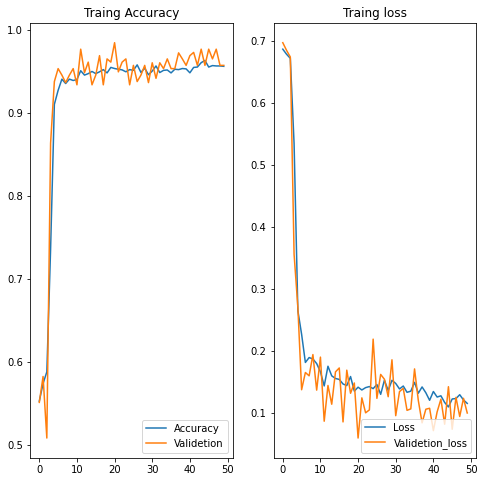

In [22]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(50),acc,label='Accuracy')
plt.plot(range(50),v_acc,label='Validetion')
plt.legend(loc='lower right')
plt.title('Traing Accuracy')

plt.subplot(1,2,2)
plt.plot(range(50),loss,label='Loss')
plt.plot(range(50),v_loss,label='Validetion_loss')
plt.legend(loc='lower right')
plt.title('Traing loss')
plt.show()


In [36]:
def predict(model,img):
  img_array = keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array,0)

  prediction=model.predict(img_array)

  predict_class=classes[np.argmax(prediction[0])]
  confidence=round(100*(np.argmax(prediction[0])),2)
  return predict_class,confidence

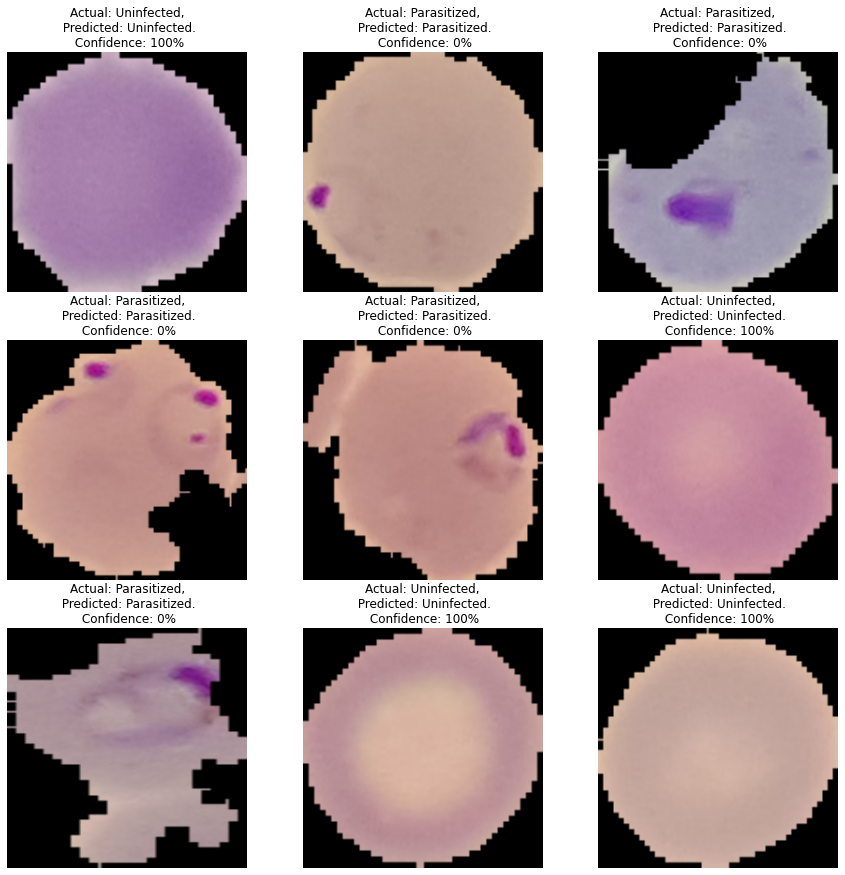

In [37]:
plt.figure(figsize=(15,15))
for images,label in test_ds.take(1):
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    prediction_class,confidence = predict(model,images[i].numpy())
    actual_class=classes[label[i]]
    plt.title(f"Actual: {actual_class},\n Predicted: {prediction_class}.\n Confidence: {confidence}%")
    plt.axis('off')

In [41]:
mv=2
model.save(f'/content/drive/MyDrive/Colab Notebooks/A2__>project/model/{mv}')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/A2__>project/model/2/assets


In [44]:
mv=max([int(i) for i in os.listdir('/content/drive/MyDrive/Colab Notebooks/A2__>project/model')])+1
model.save(f'/content/drive/MyDrive/Colab Notebooks/A2__>project/model/{mv}')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/A2__>project/model/4/assets
